In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
path = "D:\seiyuu.jpg"
img = cv2.imread(path, 1)

<h1> Harris Corner</h1>

In [2]:
block_size = 2
ksize = 3
k = 0.04
corners = cv2.cornerHarris(img, block_size, ksize, k)
threshold = 0.01 * corners.max()
img [corners > threshold] = [255]
cv2.imshow("Harris", img)

<h1> SIFT </h1>

In [3]:
sift = cv2.SIFT_create()

def siftify(image):
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return cv2.drawKeypoints(image, keypoints, outImage = None) #imageWithKeypoints

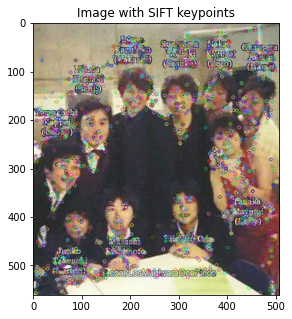

In [4]:
#Display
plt.figure(figsize=(20, 5))
plt.imshow(cv2.cvtColor(siftify(img), cv2.COLOR_BGR2RGB))
plt.title("Image with SIFT keypoints")
plt.show()

In [5]:
start = time.time()
cv2.imshow("img keypts",siftify(img))
end = time.time()
print("RunTime = ", end - start)
ResizedImage = cv2.resize(img,[800,800])
cv2.imshow("Resized img keypts",siftify(ResizedImage))

RunTime =  0.08083748817443848


<h1> SURF </h1>

In [6]:
#cv2.imshow("status",img)
start = time.time()
end = time.time()
print("RunTime = ", end - start)

RunTime =  0.0


<h1> Hessian Matrix </h1>

In [7]:
gray = cv2.imread(path, 0)
#Hessian operator masks
mask_x = np.array([[1,0,-1], [2,0,-2],[1,0,-1]])
mask_y = np.array([[1,2,1], [0,0,0],[-1,2,-1]])

# 2nd order partial derivatives compuatation
ix = cv2.filter2D(gray, cv2.CV_64F, mask_x)
iy = cv2.filter2D(gray, cv2.CV_64F, mask_y)

#Compute Hessian matrix elements
ixx = cv2.filter2D(ix, cv2.CV_64F, mask_x)
iyy = cv2.filter2D(iy, cv2.CV_64F, mask_y)
ixy = cv2.filter2D(ix, cv2.CV_64F, mask_y)

#Calculate determinant
hessian_det = (ixx * iyy) - (ixy ** 2)
hessian_det


array([[ 0.000000e+00, -2.502240e+05, -6.846400e+04, ...,  3.952000e+04,
         0.000000e+00,  0.000000e+00],
       [-1.000000e+02, -2.570240e+05, -4.442400e+04, ...,  6.089200e+04,
         0.000000e+00,  0.000000e+00],
       [-1.000000e+02, -2.756680e+05,  7.360000e+02, ...,  7.082800e+04,
         0.000000e+00,  0.000000e+00],
       ...,
       [-1.444000e+03, -4.884000e+03, -3.485000e+05, ..., -6.569600e+04,
        -5.487200e+04, -4.000000e+02],
       [-1.156000e+03, -1.816960e+05, -6.184360e+05, ..., -1.869960e+05,
        -9.290000e+04, -1.296000e+03],
       [ 0.000000e+00, -4.661200e+05, -1.150912e+06, ..., -2.579760e+05,
        -1.363120e+05,  0.000000e+00]])

In [8]:
# For Visualization
cv2.imshow("image",gray.astype(np.uint8))
cv2.imshow("ix",ix)
cv2.imshow("iy",iy)
cv2.imshow("ixx",ixx)
cv2.imshow("iyy",iyy)
cv2.imshow("ixy",ixy)
cv2.imshow("Hessian Determinant", hessian_det.astype(np.uint8))

In [9]:
cv2.waitKey(0)
cv2.destroyAllWindows()

<h1> FAST </h1>

<h3> Uses ID3 Algorithm</h3>

In [10]:
fast = cv2.FastFeatureDetector_create()
#find + draw keypoints
kp = fast.detect(gray,None)
img2 = cv2.drawKeypoints(gray,kp,None, color=(255,0,0))
#print all default params
print("Threshold:()".format(fast.getThreshold()))
print("Nonmaxsuppression:()".format(fast.getNonmaxSuppression()))
print("neighbourhood:()".format(fast.getType()))
print("Total Keypoints with Nonmaxsuppression:()".format(len(kp)))
cv2.imwrite("fast_true.png",img2)

#Disable nonmaxsuppression
fast.setNonmaxSuppression(0)
kp=fast.detect(gray,None)
print("Total Keypoints without Nonmaxsuppression:()".format(len(kp)))
img3 = cv2.drawKeypoints(gray,kp,None, color=(255,0,0))
cv2.imwrite("fast_false.png",img3)

Threshold:()
Nonmaxsuppression:()
neighbourhood:()
Total Keypoints with Nonmaxsuppression:()
Total Keypoints without Nonmaxsuppression:()


True

<h1> BRIEF</h1>

In [11]:
#Initiate FAST detector
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
kp,des = brief.compute(gray, kp)
print(brief.descriptorSize())
print(des.shape)

32
(28654, 32)


<h1> ORB </h1>

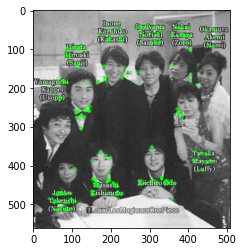

(<matplotlib.image.AxesImage at 0x2365e6c6200>, None)

In [12]:
orb =cv2.ORB_create()
kp=orb.detect(gray,None)
kp,des = orb.compute(gray, kp)
img4 = cv2.drawKeypoints(gray,kp,None,color=(0,255,0),flags=0)
plt.imshow(img4), plt.show()